In [1]:
import os
import tarfile 

import urllib

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


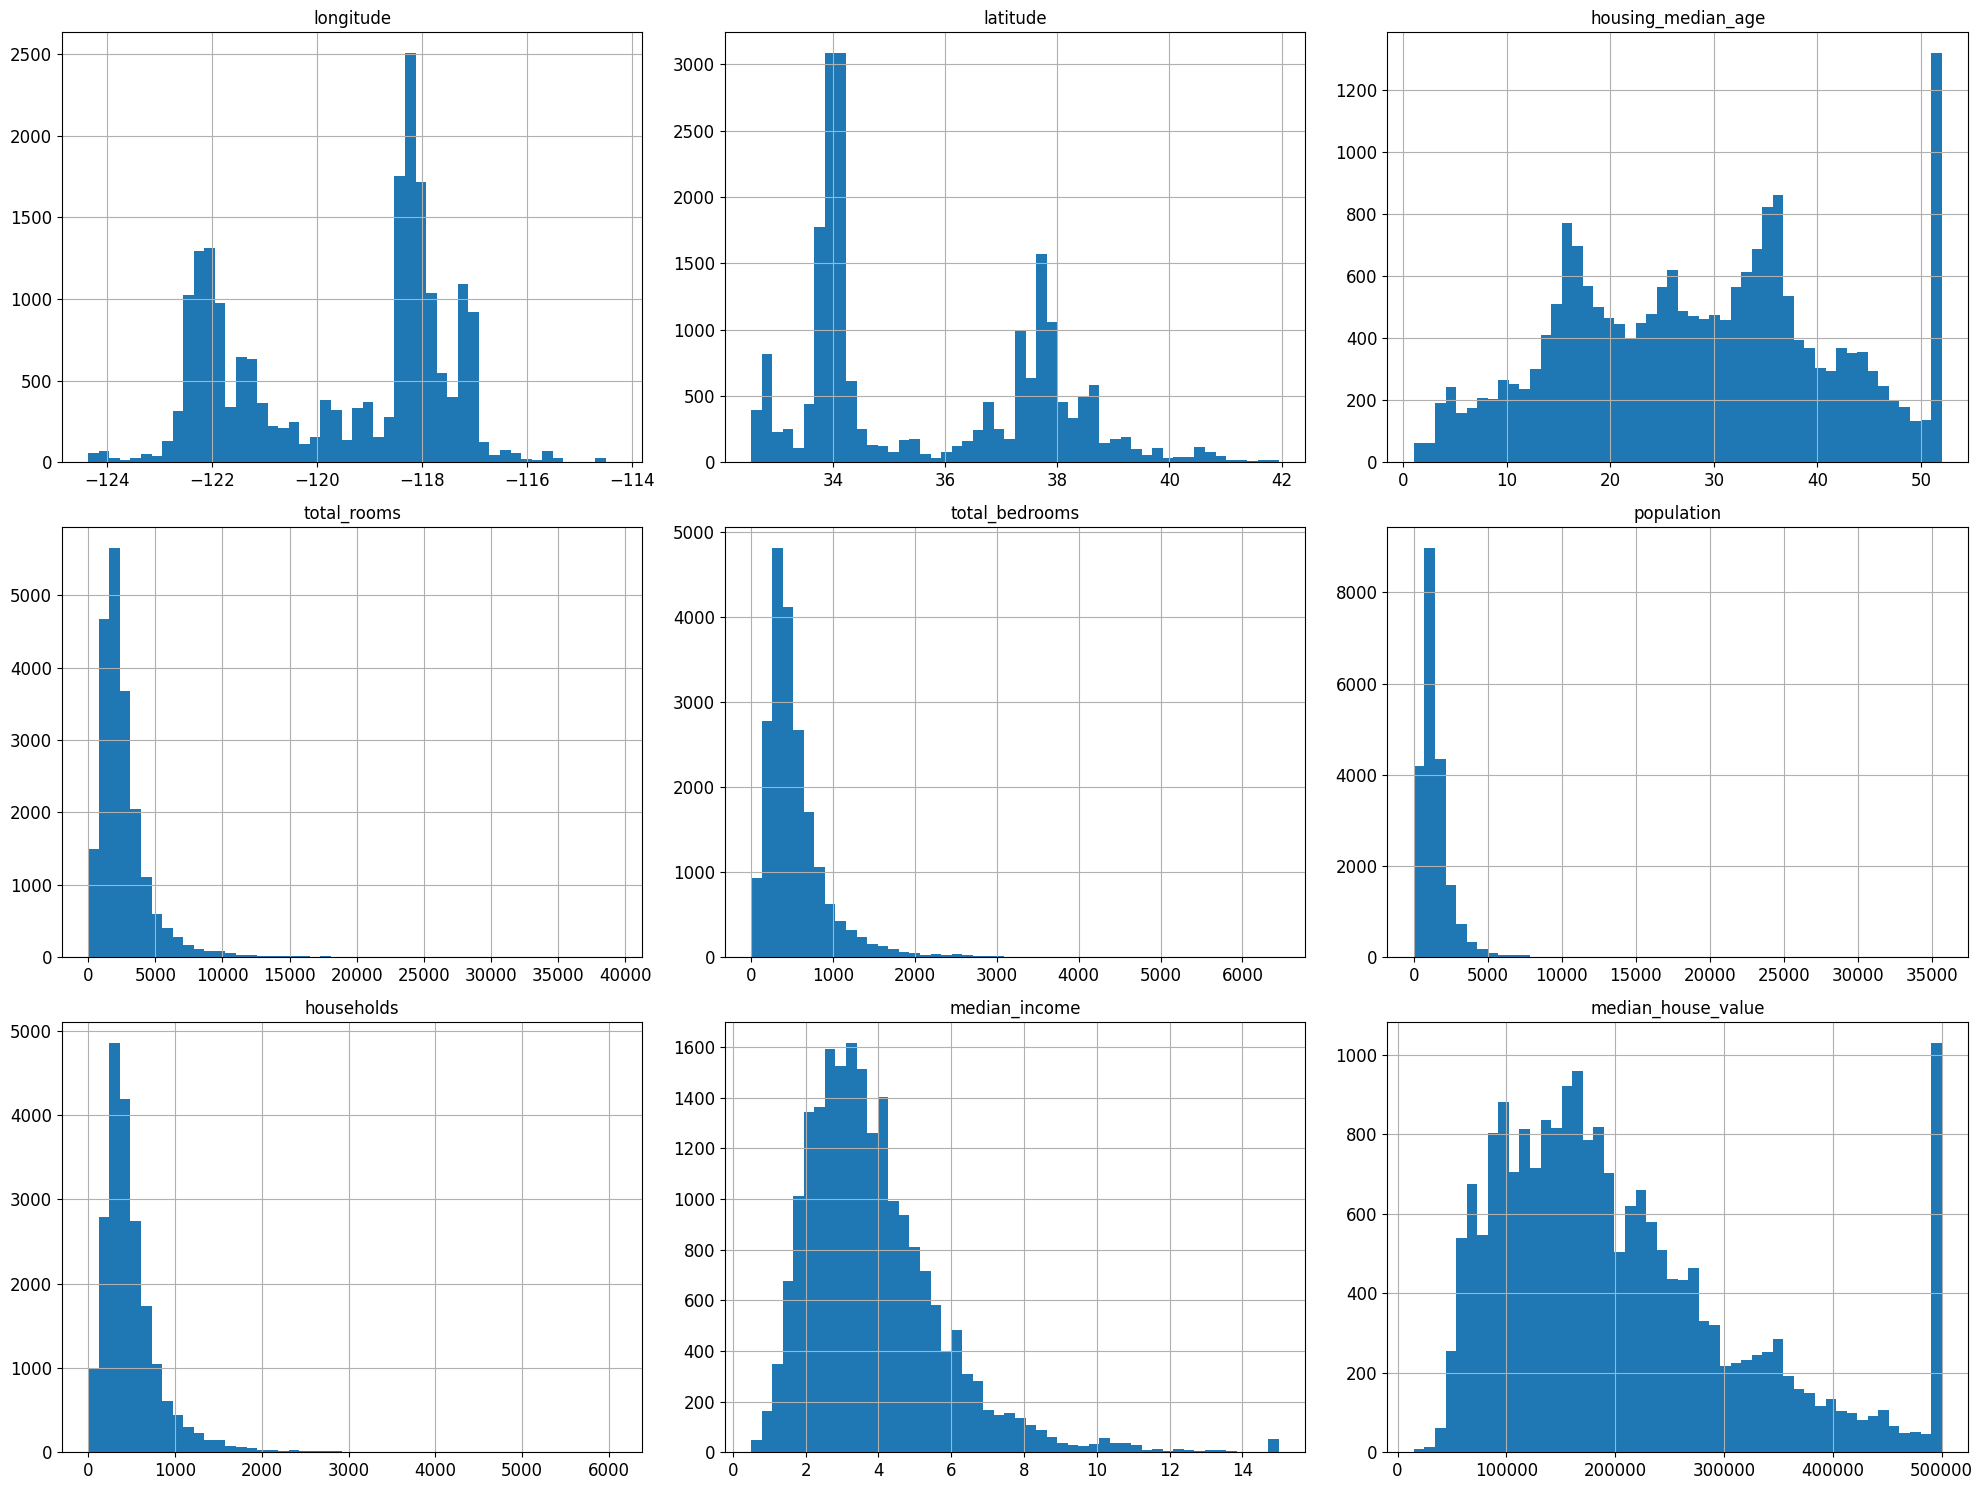

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [11]:
# to make this notebook's output identical at every run
np.random.seed(69)

In [12]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [17]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [18]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [20]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=69)

In [22]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9995,-121.03,39.14,10.0,3138.0,524.0,1275.0,511.0,4.0775,164500.0,INLAND
5120,-118.30,33.96,47.0,2112.0,417.0,1161.0,368.0,3.9722,117400.0,<1H OCEAN
11002,-117.80,33.75,29.0,3058.0,488.0,1197.0,474.0,5.3903,286600.0,<1H OCEAN
19854,-119.31,36.39,32.0,2293.0,466.0,1538.0,468.0,1.9342,68600.0,INLAND
5427,-118.42,34.02,34.0,2995.0,942.0,2626.0,947.0,2.2402,450000.0,<1H OCEAN


<Axes: >

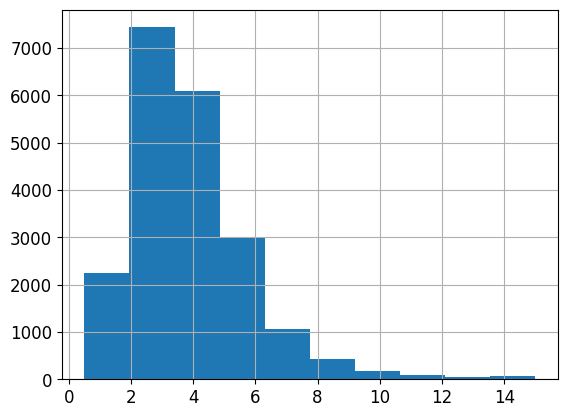

In [23]:
housing["median_income"].hist()

In [25]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [34]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

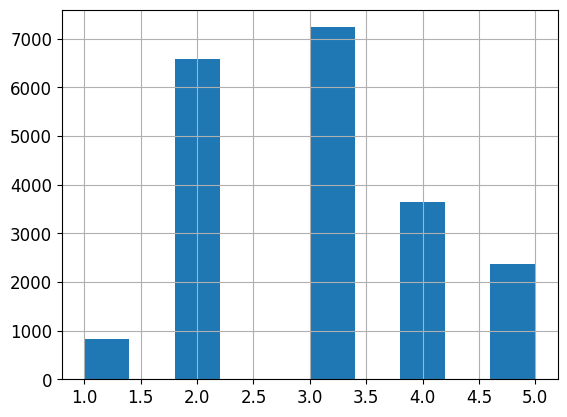

In [35]:
housing["income_cat"].hist()

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [37]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [38]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [39]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=69)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [40]:

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.039244,-1.459854,0.364964
2,0.318847,0.318798,0.317829,-0.319100,-0.015195
3,0.350581,0.350533,0.352955,0.677170,-0.013820
4,0.176308,0.176357,0.170300,-3.407530,0.027480
5,0.114438,0.114341,0.119671,4.572396,-0.084674


In [41]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [42]:
## for set_ in (strat_train_set, strat_test_set):
##    set_.drop("ocean_proximity", axis=1, inplace=True)

In [44]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14264,-117.10,32.69,35.0,1292.0,272.0,1183.0,272.0,2.0547,98000.0,NEAR OCEAN
18620,-122.03,37.00,30.0,2077.0,342.0,816.0,328.0,5.2078,440500.0,NEAR OCEAN
5895,-118.32,34.17,40.0,1868.0,356.0,799.0,403.0,2.9306,279300.0,<1H OCEAN
15473,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,5.0123,210400.0,NEAR OCEAN
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


In [45]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


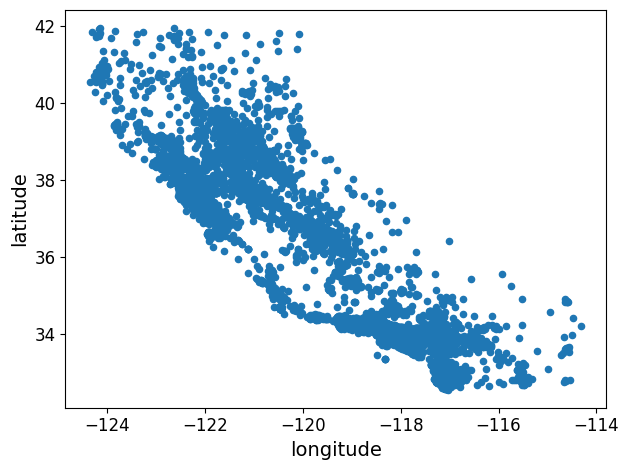

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


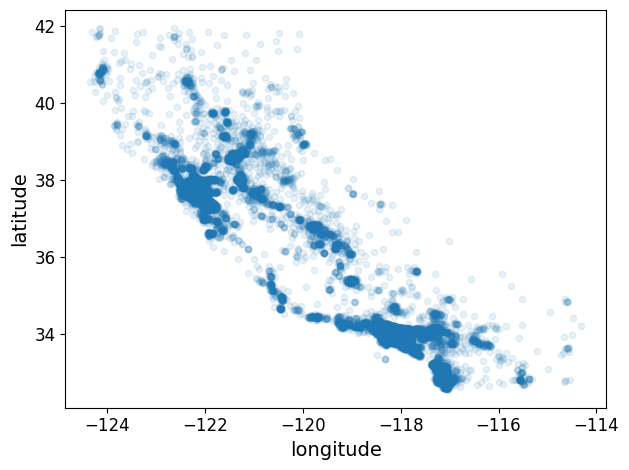

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

Saving figure housing_prices_scatterplot


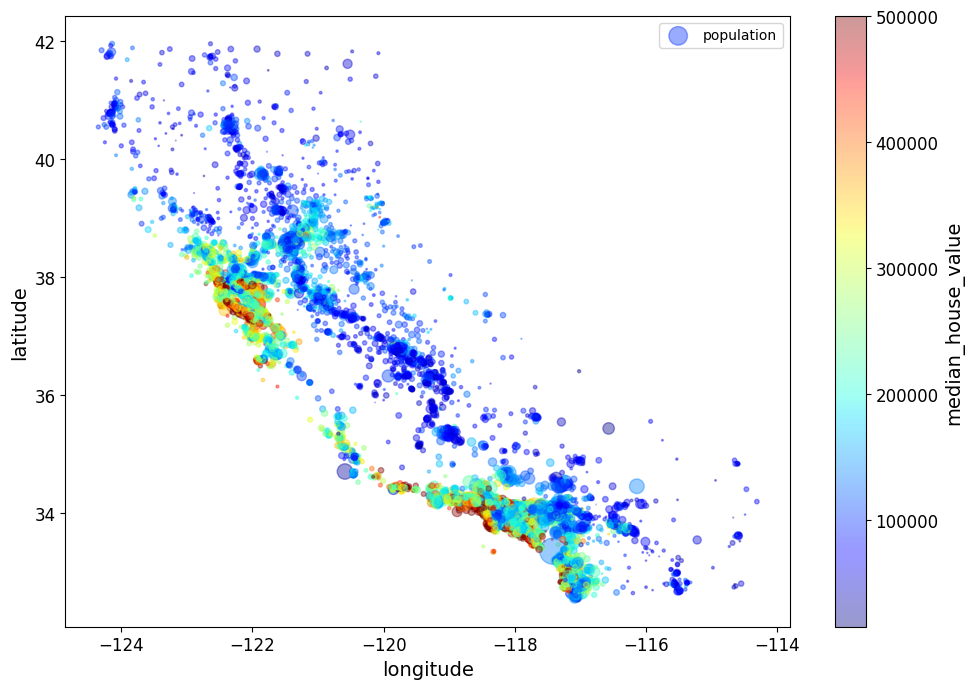

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [49]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7fb77023b520>)

Saving figure california_housing_prices_plot


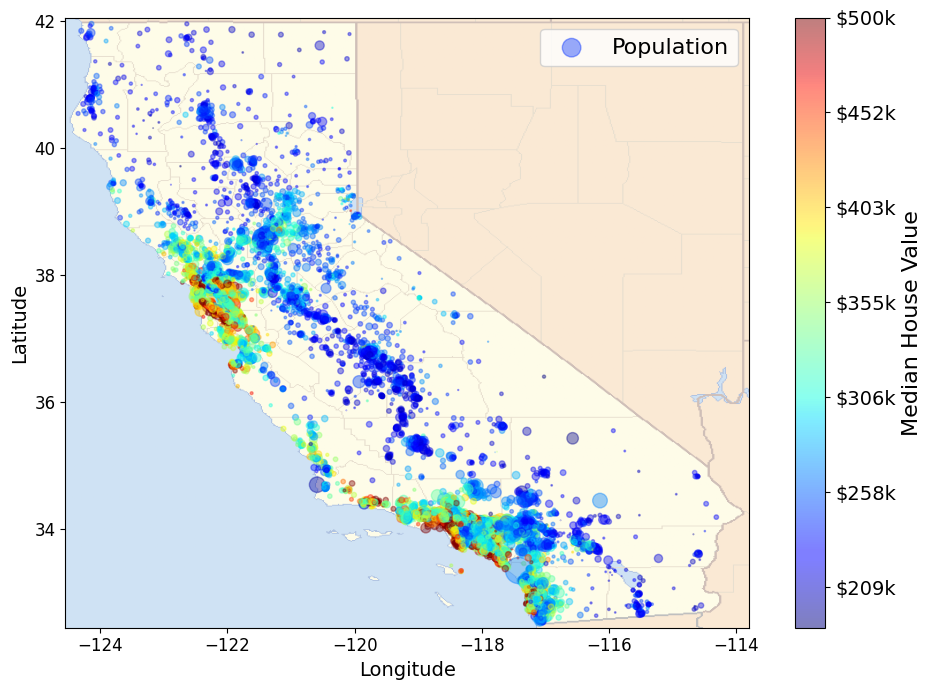

In [50]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [51]:
corr_matrix = housing.corr(numeric_only=True)

In [52]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688762
total_rooms           0.138456
housing_median_age    0.104379
households            0.070768
total_bedrooms        0.054230
population           -0.021337
longitude            -0.043728
latitude             -0.147151
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


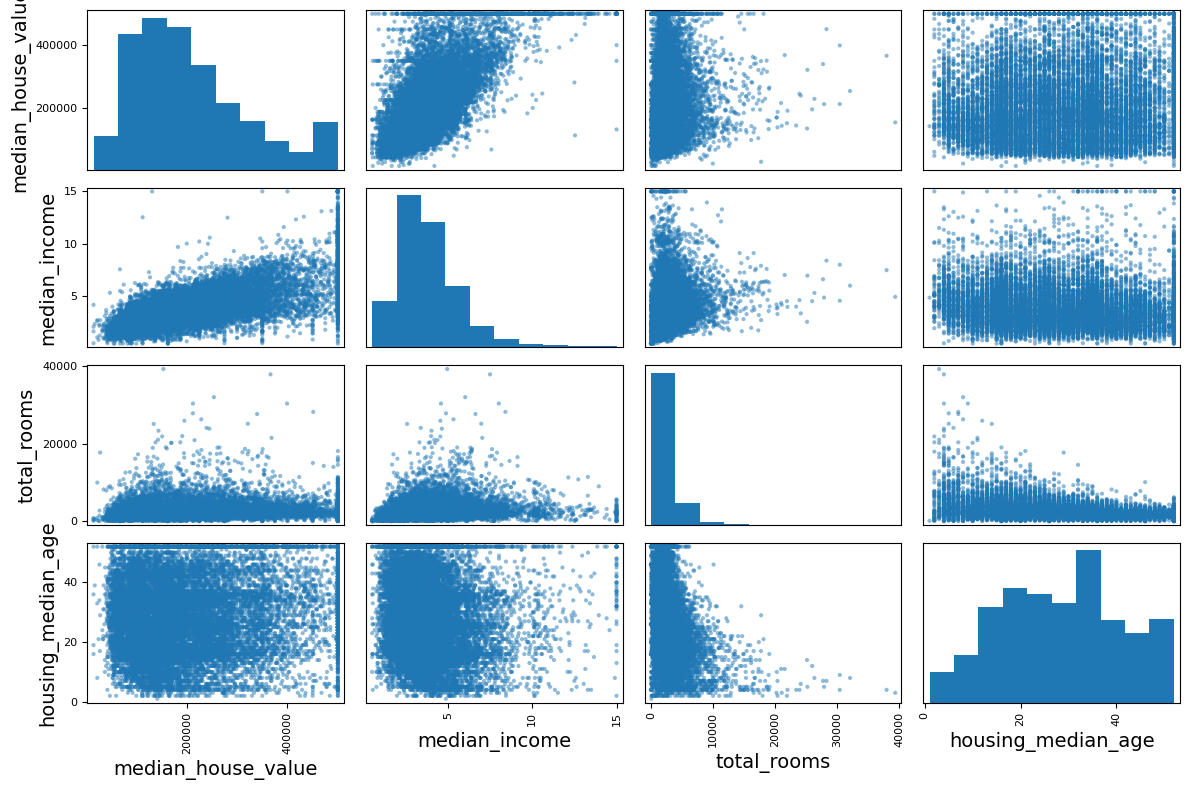

In [53]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


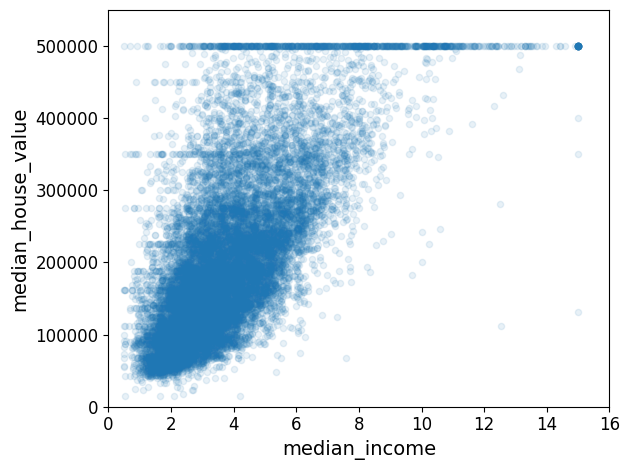

In [54]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [55]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [56]:

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688762
rooms_per_household         0.155150
total_rooms                 0.138456
housing_median_age          0.104379
households                  0.070768
total_bedrooms              0.054230
population                 -0.021337
longitude                  -0.043728
population_per_household   -0.051773
latitude                   -0.147151
bedrooms_per_room          -0.257702
Name: median_house_value, dtype: float64

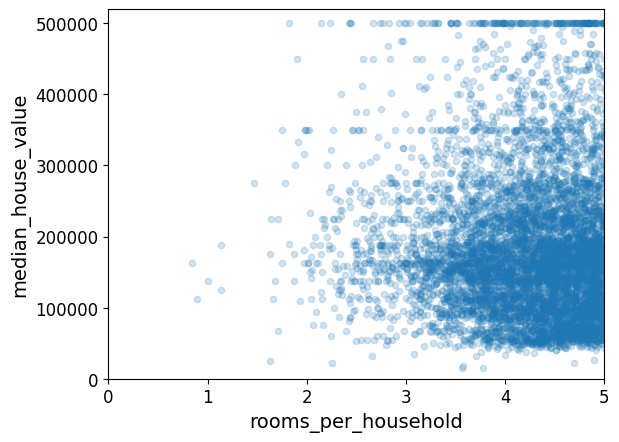

In [57]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [58]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16346.000000,16512.000000
mean,-119.572352,35.634663,28.646500,2637.833394,538.391717,1421.289729,500.170240,3.875591,207506.388566,5.422375,0.212855,2.976691
std,2.004467,2.137448,12.568094,2169.783666,420.118219,1114.838568,381.007152,1.912183,115890.193088,2.310160,0.057468,4.818908
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1451.750000,297.000000,788.000000,281.000000,2.563975,119600.000000,4.443658,0.175476,2.425880
50%,-118.490000,34.260000,29.000000,2131.000000,434.000000,1163.000000,410.000000,3.539100,180600.000000,5.226528,0.203397,2.815576
75%,-118.010000,37.720000,37.000000,3152.250000,648.000000,1725.000000,606.000000,4.744375,266400.000000,6.050719,0.239386,3.279395
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,132.533333,1.000000,599.714286


## Prepare the Data for Machine Learning Algorithms

In [59]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set

housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [60]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2420,-119.44,36.58,37.0,1054.0,NaN,879.0,257.0,2.5234,INLAND
20069,-120.37,38.01,30.0,473.0,NaN,242.0,93.0,2.5417,INLAND
8915,-118.46,34.03,52.0,523.0,NaN,317.0,130.0,2.2794,<1H OCEAN
10236,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,<1H OCEAN
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,INLAND


sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

sample_incomplete_rows

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [62]:
##Housing_num = housing.drop("ocean_proximity", axis=1)
housing_num = housing.select_dtypes(include=[np.number])

In [63]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [64]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2131.    ,  434.    , 1163.    ,
        410.    ,    3.5391])

In [65]:
len(imputer.statistics_)

8

In [66]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2131.    ,  434.    , 1163.    ,
        410.    ,    3.5391])

In [67]:
len(housing_num.median().values)

8

### Transform the training set:

In [83]:
X = imputer.transform(housing_num)

In [84]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [85]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
2420,-119.44,36.58,37.0,1054.0,434.0,879.0,257.0,2.5234
20069,-120.37,38.01,30.0,473.0,434.0,242.0,93.0,2.5417
8915,-118.46,34.03,52.0,523.0,434.0,317.0,130.0,2.2794
10236,-117.92,33.87,33.0,1597.0,434.0,1888.0,423.0,3.0550
1456,-121.98,37.96,22.0,2987.0,434.0,1420.0,540.0,3.6500


In [86]:
imputer.strategy

'median'

In [87]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [88]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14264,-117.10,32.69,35.0,1292.0,272.0,1183.0,272.0,2.0547
18620,-122.03,37.00,30.0,2077.0,342.0,816.0,328.0,5.2078
5895,-118.32,34.17,40.0,1868.0,356.0,799.0,403.0,2.9306
15473,-117.22,33.14,5.0,4576.0,848.0,2314.0,705.0,5.0123
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911


## Handling Text and Categorical Attributes

In [89]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14264,NEAR OCEAN
18620,NEAR OCEAN
5895,<1H OCEAN
15473,NEAR OCEAN
18,NEAR BAY
3472,<1H OCEAN
16925,NEAR BAY
7095,<1H OCEAN
5833,<1H OCEAN
19417,INLAND


In [90]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [0.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.],
       [1.]])

In [91]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [92]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [93]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [94]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Transformation Pipelines

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [97]:
housing_num_tr

array([[ 1.23345818, -1.37769546,  0.5055415 , ..., -0.29106022,
         0.28483944, -0.04794628],
       [-1.22612272,  0.6387889 ,  0.10769664, ...,  0.39389883,
        -0.10145475, -0.7444918 ],
       [ 0.62479922, -0.68526   ,  0.90338636, ..., -0.34073979,
        -0.20628968, -0.35089129],
       ...,
       [ 1.13367802, -1.25137278,  0.10769664, ...,  1.16741337,
        -0.09548819, -0.70576787],
       [ 0.43521692, -0.62443796, -0.13101027, ...,  0.57758002,
         0.07645979, -1.05714205],
       [ 0.42024989, -0.63847382, -0.29014822, ...,  0.70170993,
         0.11074201, -1.04888291]])

In [98]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [99]:
housing_prepared

array([[ 1.23345818, -1.37769546,  0.5055415 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.22612272,  0.6387889 ,  0.10769664, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.62479922, -0.68526   ,  0.90338636, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.13367802, -1.25137278,  0.10769664, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.43521692, -0.62443796, -0.13101027, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42024989, -0.63847382, -0.29014822, ...,  0.        ,
         0.        ,  0.        ]])

In [100]:
housing_prepared.shape

(16512, 16)

### Select and Train a Model

#### Training and Evaluating on the Training Set

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [103]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [144449.79947921 305352.74668564 205585.83557488 234274.03620229
 183835.69698358]


In [104]:
print("Labels:", list(some_labels))

Labels: [98000.0, 440500.0, 279300.0, 210400.0, 158700.0]


In [105]:
some_data_prepared

array([[ 1.23345818, -1.37769546,  0.5055415 , -0.62028034, -0.63461085,
        -0.21375018, -0.59887891, -0.95228629, -0.29106022,  0.28483944,
        -0.04794628,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.22612272,  0.6387889 ,  0.10769664, -0.25848216, -0.46719401,
        -0.54295579, -0.45189559,  0.69671629,  0.39389883, -0.10145475,
        -0.7444918 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.62479922, -0.68526   ,  0.90338636, -0.35480805, -0.43371064,
        -0.5582051 , -0.25504294, -0.49420968, -0.34073979, -0.20628968,
        -0.35089129,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17359009, -1.16715765, -1.88152766,  0.89328044,  0.7429906 ,
         0.8007772 ,  0.53761711,  0.59447405,  0.46249489,  0.06341428,
        -0.43082564,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.3408699 ,  1.03179281,  1

In [106]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68585.60589769523

## Quick decision tree regressor

In [108]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [109]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross-Validation for a better evaluation

In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [112]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67764.59330363 71823.25040989 68735.31389013 68728.80303661
 74693.41802642 68769.11269582 66616.81185315 70990.13029595
 71549.12534087 69342.42980724]
Mean: 69901.29886597053
Standard deviation: 2241.4504888429824


### Linear regressor cross-validation

In [113]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [64776.82128231 71435.43405848 69259.70906329 86886.38160915
 73441.67912002 69361.38445228 65000.75504744 71654.65094824
 68629.13271959 65947.34556344]
Mean: 70639.32938642218
Standard deviation: 6076.505168698771


In [117]:
### Linear regressor performs better than decision tree on the validation set
### Let's try a quick random forest regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [119]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18573.15864796325

In [120]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [46985.6441213  52315.21836891 50067.47857898 49904.63489366
 52231.73650659 51762.66630551 49479.79420756 47886.37003524
 52807.50603493 48161.94396608]
Mean: 50160.29930187616
Standard deviation: 1956.770114584635


In [121]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     70639.329386
std       6405.198849
min      64776.821282
25%      66617.792352
50%      69310.546758
75%      71599.846726
max      86886.381609
dtype: float64

In [122]:
## Quick support vector machine

In [123]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111057.90570366281

## Fine-tuning of the model

### Grid Search

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [127]:
## Find the best hyperparameters

In [128]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [129]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [130]:
## Score of each parameter within CV

In [131]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64966.111801721585 {'max_features': 2, 'n_estimators': 3}
55874.131718438875 {'max_features': 2, 'n_estimators': 10}
53125.12354695426 {'max_features': 2, 'n_estimators': 30}
58983.5328279375 {'max_features': 4, 'n_estimators': 3}
51853.46149057187 {'max_features': 4, 'n_estimators': 10}
49945.531423610555 {'max_features': 4, 'n_estimators': 30}
59686.89434071056 {'max_features': 6, 'n_estimators': 3}
52466.99896308403 {'max_features': 6, 'n_estimators': 10}
50255.17087161578 {'max_features': 6, 'n_estimators': 30}
58814.55664601311 {'max_features': 8, 'n_estimators': 3}
52278.70546963407 {'max_features': 8, 'n_estimators': 10}
49820.5029803336 {'max_features': 8, 'n_estimators': 30}
62469.498549546675 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54441.35078380074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59630.30241780509 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52988.809672558404 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [132]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060180,0.010929,0.002253,0.000262,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.076969e+09,-4.318821e+09,...,-4.220596e+09,1.628458e+08,18,-1.148622e+09,-1.165994e+09,-1.121319e+09,-1.085967e+09,-1.157900e+09,-1.135960e+09,2.918016e+07
1,0.180552,0.001311,0.006492,0.000064,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.112692e+09,-3.175985e+09,...,-3.121919e+09,1.519514e+08,11,-5.853798e+08,-5.913727e+08,-5.780068e+08,-5.799450e+08,-5.867018e+08,-5.842812e+08,4.806778e+06
2,0.550835,0.006700,0.019519,0.000199,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.802413e+09,-2.897792e+09,...,-2.822279e+09,1.429144e+08,9,-4.276253e+08,-4.325032e+08,-4.336573e+08,-4.457911e+08,-4.360962e+08,-4.351346e+08,5.999714e+06
3,0.096412,0.009987,0.002868,0.000892,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.523612e+09,-3.497782e+09,...,-3.479057e+09,3.634027e+07,14,-9.571259e+08,-9.403821e+08,-9.036854e+08,-9.417635e+08,-9.125871e+08,-9.311088e+08,1.985699e+07
4,0.303785,0.005003,0.006685,0.000220,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.683033e+09,-2.766041e+09,...,-2.688781e+09,1.080617e+08,5,-5.215960e+08,-5.240699e+08,-5.018811e+08,-5.066580e+08,-5.115360e+08,-5.131482e+08,8.512551e+06
5,0.901984,0.003787,0.019289,0.000106,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.471414e+09,-2.587664e+09,...,-2.494556e+09,1.163556e+08,2,-3.863444e+08,-3.902892e+08,-3.814681e+08,-3.957797e+08,-3.903448e+08,-3.888452e+08,4.755986e+06
6,0.128641,0.001654,0.002066,0.000018,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.312365e+09,-3.683305e+09,...,-3.562525e+09,1.772469e+08,16,-8.780632e+08,-9.260431e+08,-9.327564e+08,-8.759771e+08,-9.408445e+08,-9.107368e+08,2.793354e+07
7,0.421863,0.002788,0.006506,0.000118,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.795835e+09,-2.816619e+09,...,-2.752786e+09,1.227737e+08,7,-5.187932e+08,-4.951453e+08,-5.133213e+08,-4.854143e+08,-5.096748e+08,-5.044698e+08,1.233416e+07
8,1.280086,0.009999,0.019511,0.000057,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.513740e+09,-2.618569e+09,...,-2.525582e+09,1.250367e+08,3,-3.879746e+08,-3.838980e+08,-3.871225e+08,-3.842162e+08,-3.865625e+08,-3.859548e+08,1.616506e+06
9,0.162199,0.001533,0.002064,0.000017,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.399981e+09,-3.492837e+09,...,-3.459152e+09,7.701346e+07,13,-9.048201e+08,-8.859001e+08,-8.698728e+08,-9.056040e+08,-9.513167e+08,-9.035027e+08,2.732454e+07


In [135]:
### Randomised Search (good for models with loads of different hyperparameters

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb7c0ef4cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fb7c0efdeb0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [136]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49128.00540538416 {'max_features': 7, 'n_estimators': 180}
51389.65412767579 {'max_features': 5, 'n_estimators': 15}
50380.827181042085 {'max_features': 3, 'n_estimators': 72}
50564.74957184342 {'max_features': 5, 'n_estimators': 21}
49276.7794872608 {'max_features': 7, 'n_estimators': 122}
50338.34474188085 {'max_features': 3, 'n_estimators': 75}
50215.965662965 {'max_features': 3, 'n_estimators': 88}
49365.8983236507 {'max_features': 5, 'n_estimators': 100}
50090.68263388676 {'max_features': 3, 'n_estimators': 150}
65313.00358854709 {'max_features': 5, 'n_estimators': 2}


## Analysing the best models and their errors

In [139]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07233678, 0.06468896, 0.04115542, 0.01522004, 0.01520199,
       0.01573264, 0.01432432, 0.36780923, 0.06135087, 0.10538339,
       0.05110594, 0.00731107, 0.16271834, 0.00037683, 0.00177005,
       0.00351412])

In [140]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36780923485088146, 'median_income'),
 (0.16271833976251568, 'INLAND'),
 (0.1053833927520383, 'pop_per_hhold'),
 (0.07233678049030108, 'longitude'),
 (0.0646889644033863, 'latitude'),
 (0.06135086574170342, 'rooms_per_hhold'),
 (0.05110594430686131, 'bedrooms_per_room'),
 (0.04115541826300837, 'housing_median_age'),
 (0.015732638273787417, 'population'),
 (0.015220042226492921, 'total_rooms'),
 (0.015201988188100594, 'total_bedrooms'),
 (0.014324324282193953, 'households'),
 (0.007311071422087274, '<1H OCEAN'),
 (0.0035141158784434997, 'NEAR OCEAN'),
 (0.0017700458660779455, 'NEAR BAY'),
 (0.00037683329212054507, 'ISLAND')]

## Evaluating models on the test set

In [141]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [142]:
final_rmse

48592.96498565478

In [143]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46417.41377056, 50675.20292062])

In [144]:
## Using z scores instead of t scores

In [147]:
m = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46418.06675973488, 50674.60478862108)

## EWtxra Extraa

In [149]:
## Full Pipeline with preparation and prediction

In [150]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([144449.79947921, 305352.74668564, 205585.83557488, 234274.03620229,
       183835.69698358])

In [151]:
## Save the model with joblib

In [152]:
my_model = full_pipeline_with_predictor

In [153]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

In [154]:
## Example scipy distributions for grid search

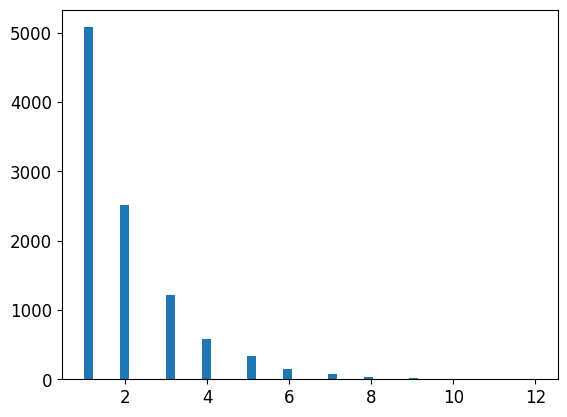

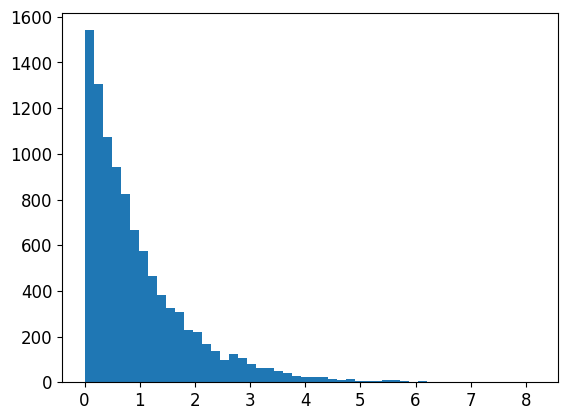

In [155]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

## Extra Exercises

### 1.

### Question: 
### Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [ ]:
## First standard SVM, no cross-validation and fine-tuning of the model

In [160]:
svm_reg = SVR()

In [161]:
svm_reg.fit(housing_prepared, housing_labels)

SVR()

In [162]:
svm_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111057.90570366281

In [165]:
## Second SVM, where cross-validation is performed, trying different linear and rbf kernels

In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear'],'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
] 

svm = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)
    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.3s
[CV] END .............................C=100.0, kernel=linear; total time=   5.3s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [166]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

71579.16054551493

In [167]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}